# **Principal Component Analysis: RNA-seq FaDu Cell Line**
Pipeline: STAR-DESeq2

In [1]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

In [36]:
# Load data
# We need a count matriz with genes in rows and samples in columns
data = pd.read_csv("normalized_RNASEQ_FaDu.csv", index_col=0, sep=",")              
data.head

<bound method NDFrame.head of                        WT_1           WT_2           WT_3        IrrKO_1  \
WASH7P            43.521779      57.896274      57.266009      53.093253   
LOC729737         78.709601     100.782402      88.890521      97.947898   
LOC102723897      84.265573      65.401346      91.454671      81.470682   
MIR6723          251.870723     347.377642     235.901768     333.205935   
LOC100133331      43.521779      60.040580      40.171678      62.247263   
...                     ...            ...            ...            ...   
ND4           200750.226090  170131.416854  193477.057620  216033.701720   
ND5            64339.079767   53392.158077   56496.764100   70797.107153   
ND6            16369.744997   12746.829602   13726.747828   17484.157572   
CYTB           58231.214737   43923.973013   52627.462268   63494.954014   
TRNP            1187.125981    1238.336966    1263.271064     998.702404   

                    IrrKO_2        IrrKO_3  
WASH7P      

In [37]:
# Column names
data. head()

,WT_1,WT_2,WT_3,IrrKO_1,IrrKO_2,IrrKO_3
WASH7P,43.521779,57.896274,57.266009,53.093253,62.552849,44.833439
LOC729737,78.709601,100.782402,88.890521,97.947898,91.265632,107.102105
LOC102723897,84.265573,65.401346,91.454671,81.470682,76.909241,92.157625
MIR6723,251.870723,347.377642,235.901768,333.205935,292.255114,551.700379
LOC100133331,43.521779,60.040580,40.171678,62.247263,57.425566,49.814933


In [38]:
# Change column names
data.columns = ['WT_1', 'WT_2', 'WT_3', 'IrrKO_1', 'IrrKO_2', 'IrrKO_3']
data.head()


,WT_1,WT_2,WT_3,IrrKO_1,IrrKO_2,IrrKO_3
WASH7P,43.521779,57.896274,57.266009,53.093253,62.552849,44.833439
LOC729737,78.709601,100.782402,88.890521,97.947898,91.265632,107.102105
LOC102723897,84.265573,65.401346,91.454671,81.470682,76.909241,92.157625
MIR6723,251.870723,347.377642,235.901768,333.205935,292.255114,551.700379
LOC100133331,43.521779,60.040580,40.171678,62.247263,57.425566,49.814933


In [39]:
# Number of rows and columns: raw counts 
print(data.shape)

(14557, 6)


Number of rows and columns: (14557, 6)

Explained variance: [7.29162647e+01 1.31576051e+01 7.06700464e+00 5.37848490e+00
 1.48064068e+00 1.76143262e-28]

Cumulative variance: [ 72.9162647   86.07386978  93.14087442  98.51935932 100.
 100.        ]


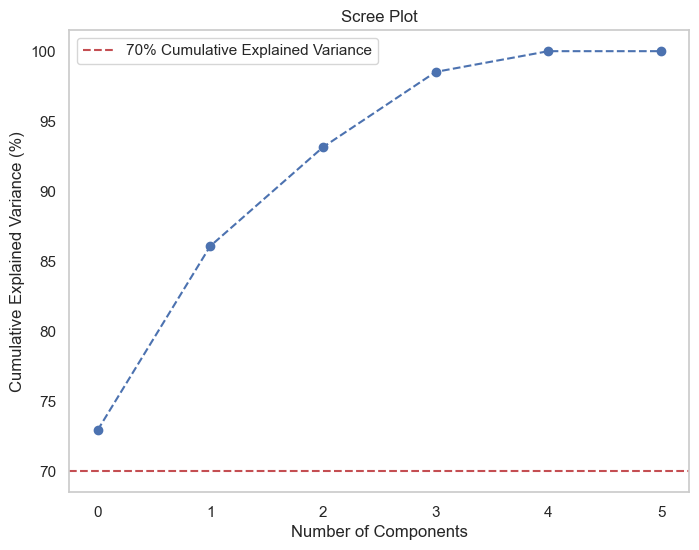

Loadings Matrix:
       WASH7P  LOC729737  LOC102723897   MIR6723  LOC100133331  LOC101928706  \
PC1  0.000043  -0.000082     -0.000091 -0.001445     -0.000054      0.000090   
PC2 -0.000325  -0.000232      0.000361 -0.000382     -0.000349     -0.000174   
PC3  0.000222  -0.000447      0.000046 -0.006393     -0.000020      0.000016   
PC4 -0.000056  -0.000404     -0.000156 -0.001609     -0.000114      0.000056   
PC5 -0.000294  -0.000014     -0.000828 -0.000489      0.000823     -0.000170   
PC6 -0.077505   0.033923      0.083239  0.044475      0.021537      0.000002   

     LOC101060494  LOC100288069  LINC00115  LINC01128  ...      ATP8  \
PC1      0.000037     -0.000145   0.000141  -0.000192  ... -0.033149   
PC2      0.000063     -0.000252  -0.000069  -0.001287  ... -0.001360   
PC3     -0.000249     -0.000010   0.000045  -0.000583  ... -0.128983   
PC4     -0.000078      0.000120  -0.000092  -0.000714  ... -0.012179   
PC5      0.000538     -0.000245   0.000511   0.000778  ... -0.

In [40]:
# Pre-process data
# Remove rows with all zeros
data = data.loc[data.sum(axis=1) != 0]
# Number of rows and columns: raw counts 
print("Number of rows and columns:", data.shape)
print()

# Transpose data to have samples as rows and genes as columns
df_tras = data.T 

# Make a PCA
# Adjust PCA with scaling and centering the data
pca = PCA()
pca_result = pca.fit_transform(df_tras)  # No need to scale or center, PCA does it internally

# Make a DataFrame with PCA results
pca_data = pd.DataFrame(pca_result[:, :2], columns=['PC1', 'PC2'], index=df_tras.index)

# Calculate explained variance and cumulative variance
explained_variance = pca.explained_variance_ratio_ * 100
cumulative_variance = np.cumsum(explained_variance)

# Show basic results
print(f"Explained variance: {explained_variance}")
print()
print(f"Cumulative variance: {cumulative_variance}")

# Show explained variance on scree plot
plt.figure(figsize=(8, 6))
plt.plot(cumulative_variance, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.title('Scree Plot')
plt.axhline(70, color='r', linestyle='--', label='70% Cumulative Explained Variance')  # You can adjust this threshold
plt.legend()
plt.grid()
plt.show()

# Loadings matrix 
loadings = pd.DataFrame(
    pca.components_, 
    columns=df_tras.columns, 
    index=[f'PC{i+1}' for i in range(pca.components_.shape[0])]
)

# Show loadings matrix
print("Loadings Matrix:")
print(loadings)


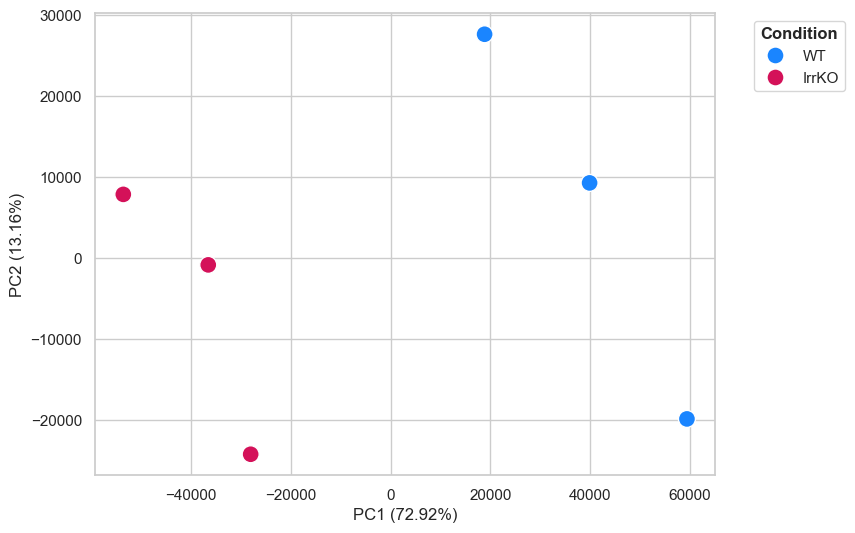

In [41]:
# Function to assign labels
def assign_label(cond_name):
    if cond_name.startswith("WT_"):
        return "WT"
    elif cond_name.startswith("IrrKO_"):
        return "IrrKO"
    else:
        return "Other"

# Asignar etiquetas a las muestras
pca_data['Condition'] = pca_data.index.map(assign_label)

custom_palette = {
        "WT": "#1A85FF",
        "IrrKO": "#D41159"
}

# Plot PCA results
# Plot style
sns.set(style="whitegrid")
# Set global font to Arial
plt.rcParams['font.family'] = 'Arial'
#sns.set(style="whitegrid", font="Arial", font_scale=1.2)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_data, x='PC1', y='PC2', hue='Condition', palette=custom_palette, s=150)
plt.xlabel(f"PC1 ({explained_variance[0]:.2f}%)")
plt.ylabel(f"PC2 ({explained_variance[1]:.2f}%)")
#plt.title("PCA of Gene Expression Data")
#plt.legend(title="Cell type", bbox_to_anchor=(1.05, 1), loc='upper left')
#plt.legend(title="Condición", bbox_to_anchor=(1.05, 1), loc='upper left')
legend = plt.legend(title="Condition", bbox_to_anchor=(1.05, 1), loc='upper left')
# Poner el título de la leyenda en negrita
legend.get_title().set_fontweight('bold')
#plt.tight_layout()
# Save plot
plt.savefig("FaDu_RNAseq_WT_vs_IrrKO_deseq2_counts.tiff", dpi=600, bbox_inches='tight')
plt.show()

In [15]:
# Python  version
!python --version

Python 3.12.1


In [16]:
# Session information
!pip list

Package                   Version
------------------------- ---------
adjustText                1.0.4
asttokens                 2.4.1
attrs                     25.3.0
certifi                   2025.4.26
charset-normalizer        3.4.2
colorama                  0.4.6
comm                      0.2.2
contourpy                 1.2.0
cycler                    0.12.1
debugpy                   1.8.2
decorator                 5.1.1
docopt                    0.6.2
et_xmlfile                2.0.0
executing                 2.0.1
fastjsonschema            2.21.1
fonttools                 4.47.2
ftpretty                  0.4.0
goatools                  1.4.12
gseapy                    1.1.8
idna                      3.10
ipykernel                 6.29.5
ipython                   8.26.0
jedi                      0.19.1
joblib                    1.4.2
jsonschema                4.23.0
jsonschema-specifications 2025.4.1
jupyter_client            8.6.2
jupyter_core              5.7.2
kiwisolver         


[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip
